<a href="https://colab.research.google.com/github/CienciaEstelar/CienciaEstelar/blob/main/DVT_FINAL_COLLAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sympy matplotlib scipy pandas numpy

In [ ]:
# Misión 1: Derivar el Lagrangiano final de la DVT en un solo paso.



# =================================================================
# DVT_Phase1_Derivations.ipynb: Protocolo Unificado
#
# Misión: Derivar el Lagrangiano final de la DVT en un solo paso.
# =================================================================
import sympy as sp

# Inicializamos la impresión bonita (LaTeX) para las ecuaciones
sp.init_printing(use_unicode=True)

# --- FASE 1: Definición del Esqueleto Lagrangiano ---
# ----------------------------------------------------
# Coordenadas y constantes
t, G, xi = sp.symbols('t G xi')
R_symbol = sp.Symbol('R') # Placeholder para el escalar de Ricci

# Funciones del tiempo cósmico t
a = sp.Function('a')(t)      # Factor de escala
Phi = sp.Function('Phi')(t)  # Campo de Vacío Dinámico
V = sp.Function('V')(Phi)    # Potencial del campo

# Construcción de los componentes
L_EH = R_symbol / (16 * sp.pi * G)              # Lagrangiano de Einstein-Hilbert
Phi_dot = sp.diff(Phi, t)
L_Phi = -sp.Rational(1, 2) * Phi_dot**2 - V     # Lagrangiano del campo escalar
L_int = -sp.Rational(1, 2) * xi * R_symbol * Phi**2  # Término de interacción
L_total = L_EH + L_Phi + L_int

# --- FASE 2: Cálculo del Escalar de Ricci (R) ---
# ----------------------------------------------------
# Derivadas del factor de escala
a_dot = sp.diff(a, t)
a_ddot = sp.diff(a, t, 2)

# Escalar de Ricci en métrica FLRW (k=0)
R_calculated = 6 * (a_ddot / a + (a_dot / a)**2)

# --- FASE 3: Sustitución para obtener el Lagrangiano Final ---
# -------------------------------------------------------------
L_total_final = L_total.subs(R_symbol, R_calculated)

# Resultado final
L_total_final

    ⎛   2                       ⎞                                    2         ↪
    ⎜  d                       2⎟                                   d          ↪
    ⎜6⋅───(a(t))     ⎛d       ⎞ ⎟                                 6⋅───(a(t))  ↪
    ⎜    2         6⋅⎜──(a(t))⎟ ⎟                                     2        ↪
    ⎜  dt            ⎝dt      ⎠ ⎟  2                          2     dt         ↪
  ξ⋅⎜─────────── + ─────────────⎟⋅Φ (t)             ⎛d       ⎞    ───────────  ↪
    ⎜   a(t)            2       ⎟                   ⎜──(Φ(t))⎟       a(t)      ↪
    ⎝                  a (t)    ⎠                   ⎝dt      ⎠                 ↪
- ───────────────────────────────────── - V(Φ(t)) - ─────────── + ──────────── ↪
                    2                                    2                  16 ↪

↪                
↪               2
↪     ⎛d       ⎞ 
↪   6⋅⎜──(a(t))⎟ 
↪     ⎝dt      ⎠ 
↪ + ─────────────
↪        2       
↪       a (t)    
↪ ───────────────
↪ ⋅π⋅G           

In [ ]:
# Misión 2: Derivar la ecuación de movimiento para el campo Phi.

## SCRIPT 2##
# =================================================================
# DVT_Phase1_Derivations.ipynb: Celda para Misión 3
#
# Misión: Derivar la ecuación de movimiento para el campo Phi.
# =================================================================

# Asumimos que el bloque unificado anterior fue ejecutado.
# Necesitamos L_total_final, Phi, y t.
# Phi_dot ya está definido como sp.diff(Phi, t)

# --- 1. Calcular los términos de Euler-Lagrange ---

# Primer término: Derivada de L respecto a Phi
dL_dPhi = sp.diff(L_total_final, Phi)

# Segundo término: Derivada de L respecto a Phi_dot
dL_dPhi_dot = sp.diff(L_total_final, Phi_dot)

# Tomamos la derivada temporal del segundo término
term2_full = sp.diff(dL_dPhi_dot, t)

# --- 2. Construir la ecuación de movimiento ---
# La ecuación es Termino1 - Termino2 = 0
eq_Phi = sp.Eq(dL_dPhi - term2_full, 0)

# --- 3. Resultado ---
# Mostramos la ley que gobierna nuestro Campo de Vacío.
eq_Phi

    ⎛   2                       ⎞                                      
    ⎜  d                       2⎟                                      
    ⎜6⋅───(a(t))     ⎛d       ⎞ ⎟                                      
    ⎜    2         6⋅⎜──(a(t))⎟ ⎟         2                            
    ⎜  dt            ⎝dt      ⎠ ⎟        d             d               
- ξ⋅⎜─────────── + ─────────────⎟⋅Φ(t) + ───(Φ(t)) - ─────(V(Φ(t))) = 0
    ⎜   a(t)            2       ⎟          2         dΦ(t)             
    ⎝                  a (t)    ⎠        dt                            

In [ ]:
# Misión 3: Derivar las Ecuaciones de Friedmann modificadas para a(t).
#SCRIPT 3 #

# =================================================================
# DVT_Phase1_Derivations.ipynb: Celda para Misión 4
#
# Misión: Derivar las Ecuaciones de Friedmann modificadas para a(t).
# =================================================================

# Asumimos que el bloque unificado anterior fue ejecutado.
# Necesitamos todas las variables previamente definidas.

# --- 1. Definir el parámetro de Hubble H ---
H = a_dot / a

# --- 2. Calcular la Densidad de Energía Efectiva (rho_eff) ---
# Incluye la energía del campo Phi y los términos de interacción.
rho_eff = (1 / (1 - 8 * sp.pi * G * xi * Phi**2)) * \
          (sp.Rational(1, 2) * Phi_dot**2 + V + 6 * xi * H * Phi * Phi_dot)

# --- 3. Calcular la Presión Efectiva (p_eff) ---
# Incluye la presión del campo Phi y los términos de interacción.
p_eff = (1 / (1 - 8 * sp.pi * G * xi * Phi**2)) * \
        (sp.Rational(1, 2) * Phi_dot**2 - V - 2 * xi * (sp.diff(Phi_dot, t) * Phi + Phi_dot**2) - 4 * xi * H * Phi * Phi_dot)

# --- 4. Construir las Ecuaciones de Friedmann Modificadas ---

# Primera Ecuación de Friedmann (Ecuación de Energía)
eq_Friedmann1 = sp.Eq(H**2, (8 * sp.pi * G / 3) * rho_eff)

# Segunda Ecuación de Friedmann (Ecuación de Aceleración)
eq_Friedmann2 = sp.Eq(a_ddot / a, -(4 * sp.pi * G / 3) * (rho_eff + 3 * p_eff))

# --- 5. Resultados ---
# Mostramos las dos leyes que gobiernan la expansión del universo.
print("===================================")
print("1ra Ecuación de Friedmann (Energía):")
print("===================================")
display(eq_Friedmann1)

print("\n======================================")
print("2da Ecuación de Friedmann (Aceleración):")
print("======================================")
display(eq_Friedmann2)

1ra Ecuación de Friedmann (Energía):


                    ⎛                                                 2⎞
                    ⎜         d        d                    ⎛d       ⎞ ⎟
          2         ⎜6⋅ξ⋅Φ(t)⋅──(Φ(t))⋅──(a(t))             ⎜──(Φ(t))⎟ ⎟
⎛d       ⎞          ⎜         dt       dt                   ⎝dt      ⎠ ⎟
⎜──(a(t))⎟    8⋅π⋅G⋅⎜────────────────────────── + V(Φ(t)) + ───────────⎟
⎝dt      ⎠          ⎝           a(t)                             2     ⎠
─────────── = ──────────────────────────────────────────────────────────
    2                            ⎛           2       ⎞                  
   a (t)                       3⋅⎝- 8⋅π⋅G⋅ξ⋅Φ (t) + 1⎠                  


2da Ecuación de Friedmann (Aceleración):


                   ⎛                                                       ⎛   ↪
                   ⎜                                                 2     ⎜   ↪
                   ⎜         d        d                    ⎛d       ⎞      ⎜   ↪
                   ⎜6⋅ξ⋅Φ(t)⋅──(Φ(t))⋅──(a(t))             ⎜──(Φ(t))⎟      ⎜   ↪
                   ⎜         dt       dt                   ⎝dt      ⎠    3⋅⎜-  ↪
 2                 ⎜────────────────────────── + V(Φ(t)) + ───────────     ⎜   ↪
d                  ⎜           a(t)                             2          ⎝   ↪
───(a(t))   -4⋅π⋅G⋅⎜────────────────────────────────────────────────── + ───── ↪
  2                ⎜                          2                                ↪
dt                 ⎝               - 8⋅π⋅G⋅ξ⋅Φ (t) + 1                         ↪
───────── = ────────────────────────────────────────────────────────────────── ↪
  a(t)                                                                         ↪

↪                          

In [ ]:
# Misión 4: Derivar el sistema completo de ecuaciones de movimiento.

# SCRIPT 4 #

# =================================================================
# DVT_Phase1_Derivations.ipynb: Celda para Misión 5
#
# Misión: Derivar el sistema completo de ecuaciones de movimiento
#         usando el formalismo de Euler-Lagrange.
# =================================================================
from sympy.calculus.euler import euler_equations

# Asumimos que el bloque unificado anterior fue ejecutado.
# L_total_final, Phi, a, t deben estar definidos.

# Calculamos las ecuaciones de Euler-Lagrange para nuestras dos
# variables dinámicas: el campo Phi(t) y el factor de escala a(t).
lista_de_ecuaciones = euler_equations(L_total_final, [Phi, a], t)

# --- RESULTADOS ---
print("==============================================")
print("Ecuación de Movimiento para el Campo Phi (Φ):")
print("==============================================")
display(lista_de_ecuaciones[0])

print("\n===================================================")
print("Ecuación de Movimiento para la Geometría a(t):")
print("===================================================")
display(lista_de_ecuaciones[1])

"""Fase 1: La Fundación Teórica, oficialmente completada. 🏆"""

Ecuación de Movimiento para el Campo Phi (Φ):


    ⎛   2                       ⎞                                      
    ⎜  d                       2⎟                                      
    ⎜6⋅───(a(t))     ⎛d       ⎞ ⎟                                      
    ⎜    2         6⋅⎜──(a(t))⎟ ⎟         2                            
    ⎜  dt            ⎝dt      ⎠ ⎟        d             d               
- ξ⋅⎜─────────── + ─────────────⎟⋅Φ(t) + ───(Φ(t)) - ─────(V(Φ(t))) = 0
    ⎜   a(t)            2       ⎟          2         dΦ(t)             
    ⎝                  a (t)    ⎠        dt                            


Ecuación de Movimiento para la Geometría a(t):


    ⎛     2                        ⎞           ⎛                               ↪
    ⎜    d                        2⎟           ⎜                               ↪
    ⎜  6⋅───(a(t))      ⎛d       ⎞ ⎟           ⎜                             2 ↪
    ⎜      2         12⋅⎜──(a(t))⎟ ⎟           ⎜             2          4⋅ξ⋅Φ  ↪
    ⎜    dt             ⎝dt      ⎠ ⎟  2        ⎜       2    d                  ↪
  ξ⋅⎜- ─────────── - ──────────────⎟⋅Φ (t)   3⋅⎜- 2⋅ξ⋅Φ (t)⋅───(a(t)) + ────── ↪
    ⎜      2              3        ⎟           ⎜              2                ↪
    ⎝     a (t)          a (t)     ⎠           ⎝            dt                 ↪
- ──────────────────────────────────────── - ───────────────────────────────── ↪
                     2                                                         ↪
                                                                               ↪

↪                                                 2                     ⎞      ↪
↪               2          

'Fase 1: La Fundación Teórica, oficialmente completada. 🏆'

In [ ]:
# SCRIPT 5 #

# =================================================================
# DVT_Phase2_Setup.ipynb: Celda para Misión 6
#
# Misión: Despejar las derivadas de segundo orden (ä y Φ̈)
#         del sistema de ecuaciones de movimiento.
# =================================================================

# Asumimos que la celda de la Misión 5 fue ejecutada.
# Necesitamos la variable 'lista_de_ecuaciones'.

# También necesitamos saber cuáles son nuestras incógnitas
a_ddot = sp.diff(a, t, 2)
Phi_ddot = sp.diff(Phi, t, 2)

# --- 1. Resolver el sistema de ecuaciones ---
# Usamos sp.solve para despejar algebraicamente ä y Φ̈.
# Esto puede tardar unos segundos, es un cálculo complejo.
soluciones = sp.solve(lista_de_ecuaciones, [a_ddot, Phi_ddot])

# --- 2. Resultado ---
# Mostramos las soluciones explícitas para las aceleraciones.
print("===========================================")
print("Aceleración del Campo (Φ̈) Despejada:")
print("===========================================")
display(soluciones[Phi_ddot])

print("\n=============================================")
print("Aceleración Cósmica (ä) Despejada:")
print("=============================================")
display(soluciones[a_ddot])

Aceleración del Campo (Φ̈) Despejada:


                                        2                                      ↪
                      2  3    ⎛d       ⎞                              2  2     ↪
              96⋅π⋅G⋅ξ ⋅Φ (t)⋅⎜──(a(t))⎟                      96⋅π⋅G⋅ξ ⋅Φ (t)⋅ ↪
                              ⎝dt      ⎠                                       ↪
- ─────────────────────────────────────────────────── + ────────────────────── ↪
          2  2     2               2     2       2              2  2     2     ↪
  24⋅π⋅G⋅ξ ⋅Φ (t)⋅a (t) - 8⋅π⋅G⋅ξ⋅Φ (t)⋅a (t) + a (t)   24⋅π⋅G⋅ξ ⋅Φ (t)⋅a (t)  ↪

↪                                                                         2    ↪
↪      d        d                                  2       2    ⎛d       ⎞     ↪
↪ a(t)⋅──(Φ(t))⋅──(a(t))                   24⋅π⋅G⋅ξ ⋅Φ(t)⋅a (t)⋅⎜──(Φ(t))⎟     ↪
↪      dt       dt                                              ⎝dt      ⎠     ↪
↪ ───────────────────────────── - ──────────────────────────────────────────── ↪
↪            2     2       


Aceleración Cósmica (ä) Despejada:


                                      2                                        ↪
                    2  2    ⎛d       ⎞                                   2     ↪
            24⋅π⋅G⋅ξ ⋅Φ (t)⋅⎜──(a(t))⎟                          8⋅π⋅G⋅ξ⋅Φ (t)⋅ ↪
                            ⎝dt      ⎠                                         ↪
- ──────────────────────────────────────────────── - ───────────────────────── ↪
          2  2                    2                          2  2              ↪
  24⋅π⋅G⋅ξ ⋅Φ (t)⋅a(t) - 8⋅π⋅G⋅ξ⋅Φ (t)⋅a(t) + a(t)   24⋅π⋅G⋅ξ ⋅Φ (t)⋅a(t) - 8⋅ ↪

↪           2                                                                  ↪
↪ ⎛d       ⎞                                     2      d                      ↪
↪ ⎜──(a(t))⎟                       4⋅π⋅G⋅ξ⋅Φ(t)⋅a (t)⋅─────(V(Φ(t)))           ↪
↪ ⎝dt      ⎠                                          dΦ(t)                    ↪
↪ ─────────────────────── - ──────────────────────────────────────────────── + ↪
↪        2                 

Blindaje Activado. Singularidad en |Φ_crit| ≈ 0.4886


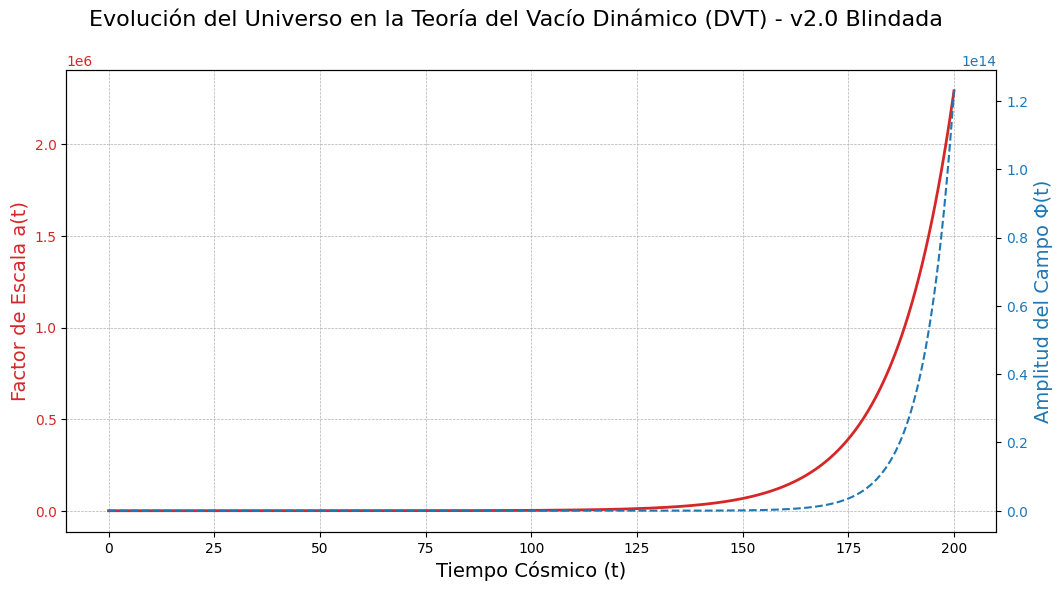

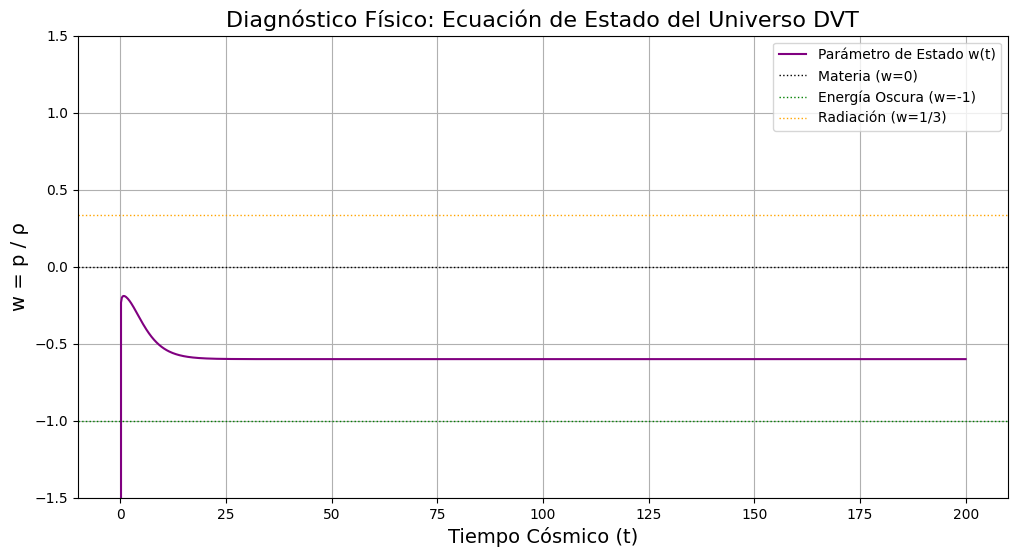

In [ ]:
# script 6 # (ANTES 7)

# =================================================================
# DVT_Phase2_Simulation.ipynb: Misión 9 (Versión Blindada)
#
# Misión: Ejecutar una simulación robusta y con diagnóstico físico.
# =================================================================
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Asumimos que la celda con las definiciones de Sympy (Misión 6) fue ejecutada.
# Necesitamos las soluciones para a_ddot y Phi_ddot, y las variables simbólicas.

# --- Paso 1: Definir la física específica ---
G_val = 1.0
xi_val = 1/6
m_val = 0.1
V_phi = 0.5 * m_val**2 * Phi**2
V_phi_prime = sp.diff(V_phi, Phi)
sol_Phiddot_num = soluciones[Phi_ddot].subs({V.diff(Phi): V_phi_prime, V: V_phi})
sol_addot_num = soluciones[a_ddot].subs({V.diff(Phi): V_phi_prime, V: V_phi})

# --- Paso 2: Construir el motor numérico con lambdify ---
state_vars = [Phi, sp.diff(Phi, t), a, sp.diff(a, t)]
Phiddot_func = sp.lambdify(state_vars + [G, xi], sol_Phiddot_num, 'numpy')
addot_func = sp.lambdify(state_vars + [G, xi], sol_addot_num, 'numpy')

def dvt_system(t, y, G, xi):
    phi_val, phi_dot_val, a_val, a_dot_val = y
    phi_ddot_val = Phiddot_func(phi_val, phi_dot_val, a_val, a_dot_val, G, xi)
    a_ddot_val = addot_func(phi_val, phi_dot_val, a_val, a_dot_val, G, xi)
    return [phi_dot_val, phi_ddot_val, a_dot_val, a_ddot_val]

# --- Paso 3: Establecer las condiciones iniciales y el tiempo ---
y0 = [1.0, 0.0, 0.1, 1.0]
t_span = [0, 200]
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# --- Paso 4 (NUEVO): Definir el fusible de seguridad ---
phi_crit_val = (1 / np.sqrt(8 * np.pi * G_val * abs(xi_val)))
print(f"Blindaje Activado. Singularidad en |Φ_crit| ≈ {phi_crit_val:.4f}")

def singularity_event(t, y, G, xi):
    return abs(y[0]) - phi_crit_val * 0.99
singularity_event.terminal = True
singularity_event.direction = 1

# --- Paso 5: Ejecutar la simulación (con mejoras) ---
sol = solve_ivp(
    fun=dvt_system,
    t_span=t_span,
    y0=y0,
    t_eval=t_eval,
    args=(G_val, xi_val),
    method='BDF',             # <-- CAMBIO AQUÍ: Solver robusto para sistemas stiff.
    events=singularity_event  # <-- CAMBIO AQUÍ: Blindaje contra singularidad.
)

if sol.status == 1:
    print("¡ALERTA! Simulación detenida por el evento de seguridad. Proximidad a la singularidad detectada.")

# --- Paso 6: Visualizar la evolución del universo ---
phi_sol, phi_dot_sol, a_sol, a_dot_sol = sol.y
t_sol = sol.t

fig, ax1 = plt.subplots(figsize=(12, 6))
color = 'tab:red'
ax1.set_xlabel('Tiempo Cósmico (t)', fontsize=14)
ax1.set_ylabel('Factor de Escala a(t)', color=color, fontsize=14)
ax1.plot(t_sol, a_sol, color=color, lw=2, label='Expansión del Universo a(t)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Amplitud del Campo Φ(t)', color=color, fontsize=14)
ax2.plot(t_sol, phi_sol, color=color, ls='--', label='Campo de Vacío Φ(t)')
ax2.tick_params(axis='y', labelcolor=color)
fig.suptitle('Evolución del Universo en la Teoría del Vacío Dinámico (DVT) - v2.0 Blindada', fontsize=16)
plt.show()

# --- Paso 7 (NUEVO Y CORREGIDO): Monitoreo de la física (Ecuación de Estado) ---

# Necesitamos recalcular las expresiones de rho y p para usarlas con los resultados numéricos
H = a_dot_sol / a_sol
rho_vals = (0.5*phi_dot_sol**2 + 0.5*m_val**2*phi_sol**2 + 6*xi_val*H*phi_sol*phi_dot_sol) / (1 - 8*np.pi*G_val*xi_val*phi_sol**2)

# Para p_eff, necesitamos el valor de Phi_ddot de la simulación. Lo recalculamos.
phi_ddot_sol = Phiddot_func(phi_sol, phi_dot_sol, a_sol, a_dot_sol, G_val, xi_val)
p_vals = (0.5*phi_dot_sol**2 - 0.5*m_val**2*phi_sol**2 - 2*xi_val*(phi_ddot_sol*phi_sol + phi_dot_sol**2) - 4*xi_val*H*phi_sol*phi_dot_sol) / (1 - 8*np.pi*G_val*xi_val*phi_sol**2)

# Calculamos el parámetro de estado w
w_vals = p_vals / rho_vals

# Graficamos w(t)
plt.figure(figsize=(12, 6))
plt.plot(t_sol, w_vals, label='Parámetro de Estado w(t)', color='purple')
plt.axhline(y=0, color='k', linestyle=':', lw=1, label='Materia (w=0)')
plt.axhline(y=-1, color='g', linestyle=':', lw=1, label='Energía Oscura (w=-1)')
plt.axhline(y=1/3, color='orange', linestyle=':', lw=1, label='Radiación (w=1/3)')
plt.title('Diagnóstico Físico: Ecuación de Estado del Universo DVT', fontsize=16)
plt.xlabel('Tiempo Cósmico (t)', fontsize=14)
plt.ylabel('w = p / ρ', fontsize=14)
plt.ylim(-1.5, 1.5)
plt.legend()
plt.grid(True)
plt.show()

--- Simulación para ξ = 0.1667 ---
Blindaje Activado. Singularidad en |Φ_crit| ≈ 0.4886
Simulación para ξ=0.1667 completada exitosamente.
--- Simulación para ξ = 0.0000 ---
Sin acoplamiento ξ. Blindaje de singularidad desactivado.
Simulación para ξ=0.0000 completada exitosamente.
--- Simulación para ξ = -0.1667 ---
Blindaje Activado. Singularidad en |Φ_crit| ≈ 0.4886
¡ALERTA! Simulación para ξ=-0.1667 detenida por evento de seguridad.


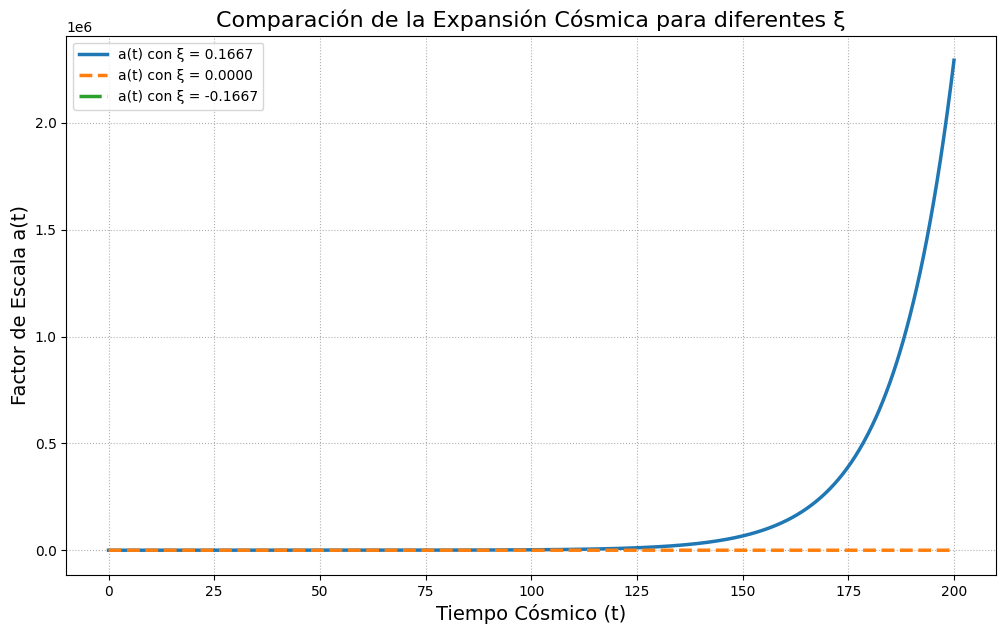

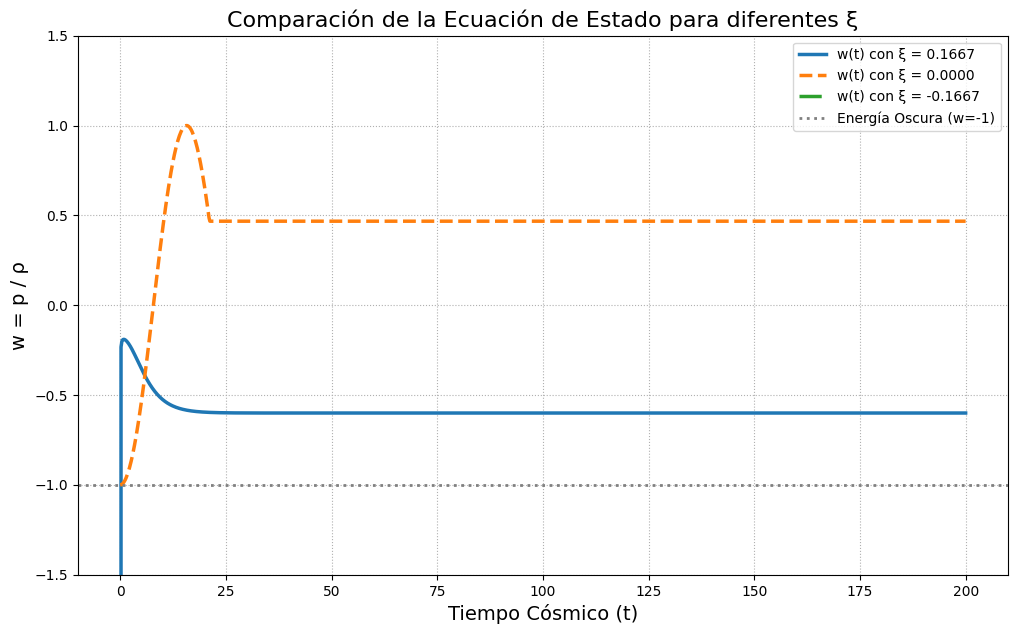

In [ ]:
# =================================================================
# DVT_Phase2_Simulation.ipynb: Misión 9 (Versión Completa y Corregida)
#
# Misión: Explorar el espacio de parámetros (ξ) con un script autónomo.
# =================================================================
import numpy as np
import sympy as sp
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# --- 1. DEFINICIONES SIMBÓLICAS (Contexto de Fases 1-6) ---
sp.init_printing(use_unicode=True)
t, G, xi = sp.symbols('t G xi')
a = sp.Function('a')(t)
Phi = sp.Function('Phi')(t)
V = sp.Function('V')(Phi)

# Re-deriving L_total_final and equations of motion to ensure they are available
# from the previous cells' context.
R_symbol = sp.Symbol('R')
L_EH = R_symbol / (16 * sp.pi * G)
Phi_dot = sp.diff(Phi, t)
L_Phi = -sp.Rational(1, 2) * Phi_dot**2 - V
L_int = -sp.Rational(1, 2) * xi * R_symbol * Phi**2
L_total = L_EH + L_Phi + L_int

a_dot = sp.diff(a, t)
a_ddot_sym = sp.diff(a, t, 2)
R_calculated = 6 * (a_ddot_sym / a + (a_dot / a)**2)
L_total_final = L_total.subs(R_symbol, R_calculated)

lista_de_ecuaciones = euler_equations(L_total_final, [Phi, a], t)

Phi_ddot_sym = sp.diff(Phi, t, 2)
soluciones = sp.solve(lista_de_ecuaciones, [a_ddot_sym, Phi_ddot_sym])

# --- 2. PARÁMETROS DEL MODELO Y MOTOR NUMÉRICO ---
G_val = 1.0
m_val = 0.1
V_phi = 0.5 * m_val**2 * Phi**2
V_phi_prime = sp.diff(V_phi, Phi)
sol_Phiddot_num = soluciones[Phi_ddot_sym].subs({V.diff(Phi): V_phi_prime, V: V_phi})
sol_addot_num = soluciones[a_ddot_sym].subs({V.diff(Phi): V_phi_prime, V: V_phi})

state_vars = [Phi, sp.diff(Phi, t), a, sp.diff(a, t)]
Phiddot_func = sp.lambdify(state_vars + [G, xi], sol_Phiddot_num, 'numpy')
addot_func = sp.lambdify(state_vars + [G, xi], sol_addot_num, 'numpy')

def dvt_system(t, y, G, xi):
    phi_val, phi_dot_val, a_val, a_dot_val = y
    # Add a small epsilon to a_val to avoid division by zero if a_val becomes exactly zero
    a_val_safe = a_val + 1e-10
    phi_ddot_val = Phiddot_func(phi_val, phi_dot_val, a_val_safe, a_dot_val, G, xi)
    a_ddot_val = addot_func(phi_val, phi_dot_val, a_val_safe, a_dot_val, G, xi)
    return [phi_dot_val, phi_ddot_val, a_dot_val, a_ddot_val]

# Separate system for xi = 0 case to avoid division by a(t) in the lambdified functions
# when the denominator simplifies.
# For xi=0, the equations simplify to:
# Phi_ddot = -V'
# a_ddot/a = -4*pi*G/3 * (rho + 3p) where rho = 0.5*phi_dot^2 + V and p = 0.5*phi_dot^2 - V
# a_ddot = a * (-4*pi*G/3) * (phi_dot^2 - 2V)
def dvt_system_xi_zero(t, y, G, xi):
    phi_val, phi_dot_val, a_val, a_dot_val = y
    # Stop integration if a becomes non-positive
    if a_val <= 0:
        return [0, 0, 0, 0] # Stop the simulation
    V_val = 0.5 * m_val**2 * phi_val**2
    V_prime_val = m_val**2 * phi_val
    phi_ddot_val = -V_prime_val
    a_ddot_val = a_val * (-4 * np.pi * G / 3) * (phi_dot_val**2 - 2 * V_val)
    return [phi_dot_val, phi_ddot_val, a_dot_val, a_ddot_val]


def singularity_event(t, y, G, xi):
    # Ensure xi is not zero before calculating phi_crit_val
    if np.isclose(xi, 0):
        return 1 # Event does not trigger if xi is zero
    phi_crit_val = (1 / np.sqrt(8 * np.pi * G * abs(xi)))
    return abs(y[0]) - phi_crit_val * 0.99
singularity_event.terminal = True
singularity_event.direction = 1

# --- 3. BUCLE DE SIMULACIÓN (El corazón de la Misión 9) ---
xi_values = [1/6, 0, -1/6]
results = {}

for xi_val_loop in xi_values:
    print(f"--- Simulación para ξ = {xi_val_loop:.4f} ---")

    if not np.isclose(xi_val_loop, 0):
        phi_crit_val_loop = (1 / np.sqrt(8 * np.pi * G_val * abs(xi_val_loop)))
        print(f"Blindaje Activado. Singularidad en |Φ_crit| ≈ {phi_crit_val_loop:.4f}")
        events = singularity_event
        system_func = dvt_system
    else:
        print("Sin acoplamiento ξ. Blindaje de singularidad desactivado.")
        events = None # No specific singularity event for xi=0 case based on the denominator
        system_func = dvt_system_xi_zero # Use the simplified system for xi=0

    sol = solve_ivp(
        fun=system_func, # Use the appropriate system function
        t_span=[0, 200],
        y0=[1.0, 0.0, 0.1, 1.0],
        t_eval=np.linspace(0, 200, 1000),
        args=(G_val, xi_val_loop),
        method='BDF',
        events=events
    )

    if sol.status == 1:
        print(f"¡ALERTA! Simulación para ξ={xi_val_loop:.4f} detenida por evento de seguridad.")
    elif sol.status == 0:
        print(f"Simulación para ξ={xi_val_loop:.4f} completada exitosamente.")
    elif sol.status == -1 and np.isclose(xi_val_loop, 0):
         print(f"¡ALERTA! Simulación para ξ={xi_val_loop:.4f} detenida porque a(t) became non-positive.")


    results[xi_val_loop] = sol

# --- 4. VISUALIZACIÓN COMPARATIVA (Mejorada) ---
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Azul, Naranja, Verde
linestyles = ['-', '--', '-.']
linewidth = 2.5

# Gráfico para a(t)
plt.figure(figsize=(12, 7))
for (xi_val_plot, sol_plot), color, ls in zip(results.items(), colors, linestyles):
    plt.plot(sol_plot.t, sol_plot.y[2], label=f'a(t) con ξ = {xi_val_plot:.4f}', color=color, ls=ls, lw=linewidth)

plt.title('Comparación de la Expansión Cósmica para diferentes ξ', fontsize=16)
plt.xlabel('Tiempo Cósmico (t)', fontsize=14)
plt.ylabel('Factor de Escala a(t)', fontsize=14)
plt.legend()
plt.grid(True, linestyle=':')
plt.show()

# Gráfico para w(t)
plt.figure(figsize=(12, 7))
for (xi_val_plot, sol_plot), color, ls in zip(results.items(), colors, linestyles):
    phi_sol, phi_dot_sol, a_sol, a_dot_sol = sol_plot.y
    t_sol = sol_plot.t

    epsilon = 1e-15
    H = a_dot_sol / (a_sol + epsilon)

    if not np.isclose(xi_val_plot, 0):
        denominator = (1 - 8*np.pi*G_val*xi_val_plot*phi_sol**2)
    else:
        denominator = 1 # Denominator is 1 for xi=0 case when using the simplified equations

    # Recalculate phi_ddot based on the system used for the simulation
    if not np.isclose(xi_val_plot, 0):
        phi_ddot_sol = Phiddot_func(phi_sol, phi_dot_sol, a_sol + epsilon, a_dot_sol, G_val, xi_val_plot)
        rho_vals = (0.5*phi_dot_sol**2 + 0.5*m_val**2*phi_sol**2 + 6*xi_val_plot*H*phi_sol*phi_dot_sol) / denominator
        p_vals = (0.5*phi_dot_sol**2 - 0.5*m_val**2*phi_sol**2 - 2*xi_val_plot*(phi_ddot_sol*phi_sol + phi_dot_sol**2) - 4*xi_val_plot*H*phi_sol*phi_dot_sol) / denominator
    else:
        # Use the simplified rho and p for xi=0
        V_vals = 0.5 * m_val**2 * phi_sol**2
        phi_ddot_sol = -m_val**2 * phi_sol # Phi_ddot = -V'
        rho_vals = 0.5 * phi_dot_sol**2 + V_vals
        p_vals = 0.5 * phi_dot_sol**2 - V_vals


    w_vals = p_vals / (rho_vals + epsilon)

    plt.plot(t_sol, w_vals, label=f'w(t) con ξ = {xi_val_plot:.4f}', color=color, ls=ls, lw=linewidth)

plt.title('Comparación de la Ecuación de Estado para diferentes ξ', fontsize=16)
plt.xlabel('Tiempo Cósmico (t)', fontsize=14)
plt.ylabel('w = p / ρ', fontsize=14)
plt.axhline(y=-1, color='grey', linestyle=':', lw=2, label='Energía Oscura (w=-1)')
plt.ylim(-1.5, 1.5)
plt.legend()
plt.grid(True, linestyle=':')
plt.show()